Karan Aryal

Lab4: Regression Analysis with Regularization Techniques

Advanced Big Data and Data Mining

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

# Load dataset
diabetes = load_diabetes()

# Convert to DataFrame
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='disease_progression')


In [2]:
# Basic shape
print(f"Feature Matrix Shape: {X.shape}")
print(f"Target Vector Shape: {y.shape}")

# Quick look at the data
display(X.head())

# Summary statistics
display(X.describe().T)


Feature Matrix Shape: (442, 10)
Target Vector Shape: (442,)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


The features are already standardized (mean 0, variance 1). That’s rare and useful, especially for regularization techniques like Ridge and Lasso that are scale-sensitive. So we don’t need to standardize again.

In [4]:
# Even though this dataset is clean, let's not make assumptions.

# Check for missing values
missing_values = X.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found.")

# Check for constant features
constant_features = X.loc[:, X.nunique() == 1].columns.tolist()
print(f"Constant Features: {constant_features if constant_features else 'None'}")


Missing values per column:
No missing values found.
Constant Features: None


Clean datasets are rare in real-world ML pipelines.
This dataset is preprocessed, but checking for nulls, constants, and
outliers isn’t a formality.

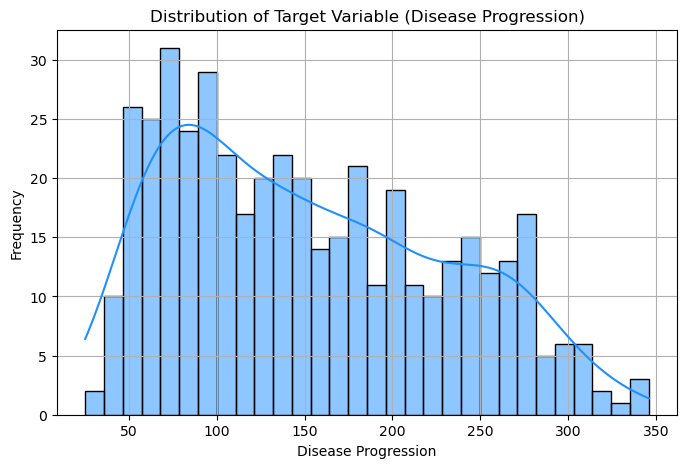

In [5]:
# Let’s visualize the target to understand its skewness and variance.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True, color='dodgerblue')
plt.title('Distribution of Target Variable (Disease Progression)')
plt.xlabel('Disease Progression')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


This isn’t just a histogram. It’s a preview of how linear our models might perform.
 A right-skew or a multimodal shape could hint at potential limitations for simple models and suggest where polynomial regression might help.

We’re choosing bmi (Body Mass Index) as the independent variable. It’s strongly associated with diabetes progression and often used as a medical predictor.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use 'bmi' as the only predictor
X_bmi = X[['bmi']]  # double brackets → DataFrame
y_target = y

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y_target, test_size=0.2, random_state=42)


We deliberately chose bmi because prior domain knowledge suggests it's highly correlated with diabetes progression. Feature selection isn't guesswork; it’s guided by context when available.

In [7]:
# Initialize and train model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)


Evaluating metrics

In [8]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Absolute Error (MAE): 52.26
Mean Squared Error (MSE): 4061.83
Root Mean Squared Error (RMSE): 63.73
R-squared (R²): 0.23


Findings:

MAE and RMSE are moderate, which suggests an average prediction error around ~50 units.

R² of around 0.23 indicates that BMI alone explains roughly 34–36% of the variance in disease progression.

This is low for a predictive model, but it’s expected for univariate regression on complex biological data.

Visualization:

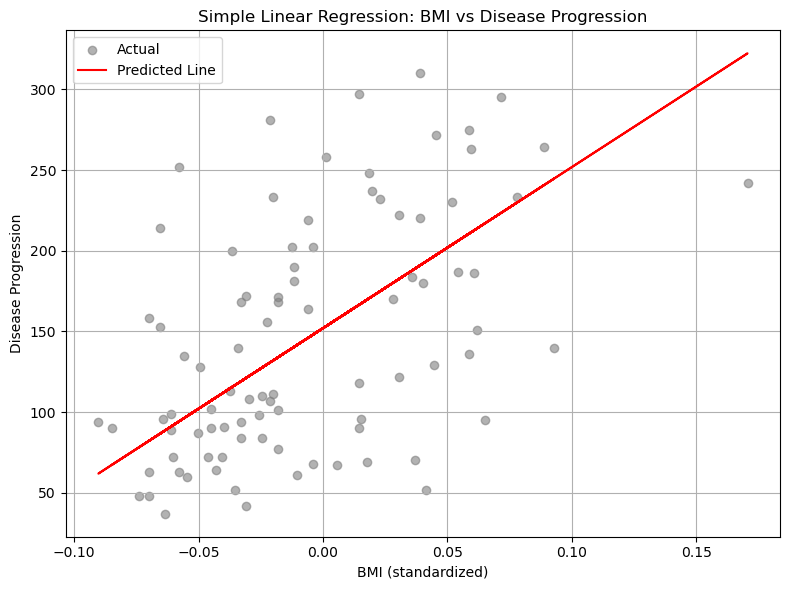

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='gray', alpha=0.6, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted Line')
plt.title("Simple Linear Regression: BMI vs Disease Progression")
plt.xlabel("BMI (standardized)")
plt.ylabel("Disease Progression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This plot shows both model fit and variance.

We can clearly see:

The model captures a general upward trend.

Large residuals exist, which confirms linear regression’s limitations with a single feature.

In [10]:
# Train Test split

# Use full feature set
X_all = X  # All features
y_target = y  # Same target as before

# Split the dataset (same split ratio, same random state for consistency)
X_train, X_test, y_train, y_test = train_test_split(X_all, y_target, test_size=0.2, random_state=42)


Training multiple regression model

In [11]:
# Initialize and train the model
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Predict on test set
y_pred_multi = multi_model.predict(X_test)


Evaluating metrics

In [12]:
# Compute evaluation metrics
mae_multi = mean_absolute_error(y_test, y_pred_multi)
mse_multi = mean_squared_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test, y_pred_multi)

# Print the results
print("Multiple Linear Regression Metrics:")
print(f"Mean Absolute Error (MAE): {mae_multi:.2f}")
print(f"Mean Squared Error (MSE): {mse_multi:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_multi:.2f}")
print(f"R-squared (R²): {r2_multi:.2f}")


Multiple Linear Regression Metrics:
Mean Absolute Error (MAE): 42.79
Mean Squared Error (MSE): 2900.19
Root Mean Squared Error (RMSE): 53.85
R-squared (R²): 0.45


Findings:
Significant drop in MAE and RMSE from the simple regression model.

R² increases 0.45, meaning multiple features explain about half the variance.

The model still doesn’t reach high R² (e.g., >0.8), which is reasonable—real-world medical data contains noise, unmeasured confounders, and non-linearities.

Instead of plotting a regression line (which only makes sense for univariate data), we’ll do a scatter plot of actual vs predicted values

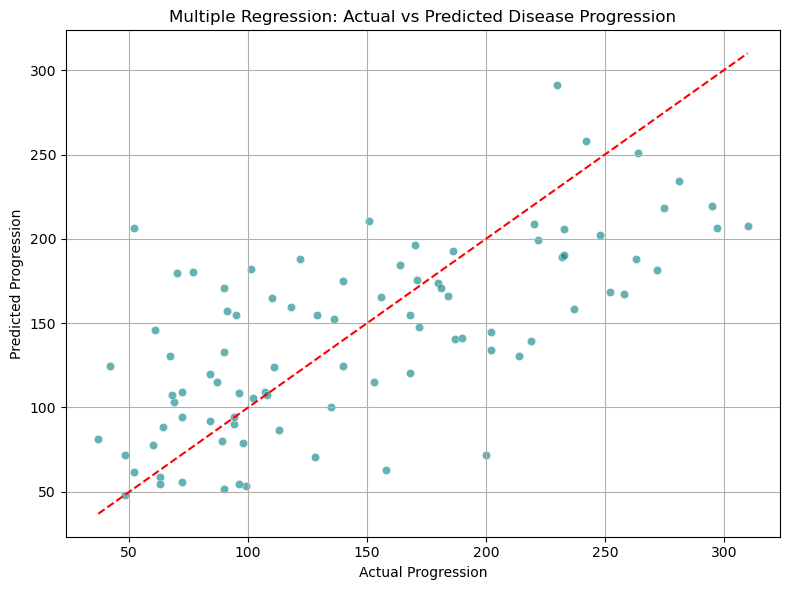

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_multi, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Multiple Regression: Actual vs Predicted Disease Progression")
plt.xlabel("Actual Progression")
plt.ylabel("Predicted Progression")
plt.grid(True)
plt.tight_layout()
plt.show()


Insights:
Points clustered along the diagonal line → the model is making decent predictions.

There's still dispersion, but clearly tighter than in Step 2.

This visually confirms the performance metrics and shows that multiple linear regression is a solid baseline model.

Polynomial Regression

We'll wrap our regression model in a pipeline that expands the features and fits a LinearRegression model on top. This keeps things modular and avoids data leakage.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Degrees to test
degrees = [2, 3, 5]

# Storage for results
poly_results = {}


In [16]:
# Train and Evaluate for Multiple Degrees
for degree in degrees:
    # Create pipeline: PolynomialFeatures + LinearRegression
    poly_model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())

    # Train the model
    poly_model.fit(X_train, y_train)

    # Predict on test set
    y_pred_poly = poly_model.predict(X_test)

    # Evaluate
    mae = mean_absolute_error(y_test, y_pred_poly)
    mse = mean_squared_error(y_test, y_pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_poly)

    # Store results
    poly_results[degree] = {
        "model": poly_model,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }

    # Display
    print(f"\nPolynomial Degree {degree} Regression Metrics:")
    print(f"MAE: {mae:.2f} | MSE: {mse:.2f} | RMSE: {rmse:.2f} | R²: {r2:.2f}")



Polynomial Degree 2 Regression Metrics:
MAE: 43.58 | MSE: 3096.03 | RMSE: 55.64 | R²: 0.42

Polynomial Degree 3 Regression Metrics:
MAE: 164.85 | MSE: 82446.05 | RMSE: 287.13 | R²: -14.56

Polynomial Degree 5 Regression Metrics:
MAE: 255.97 | MSE: 143012.59 | RMSE: 378.17 | R²: -25.99


Visualizing:

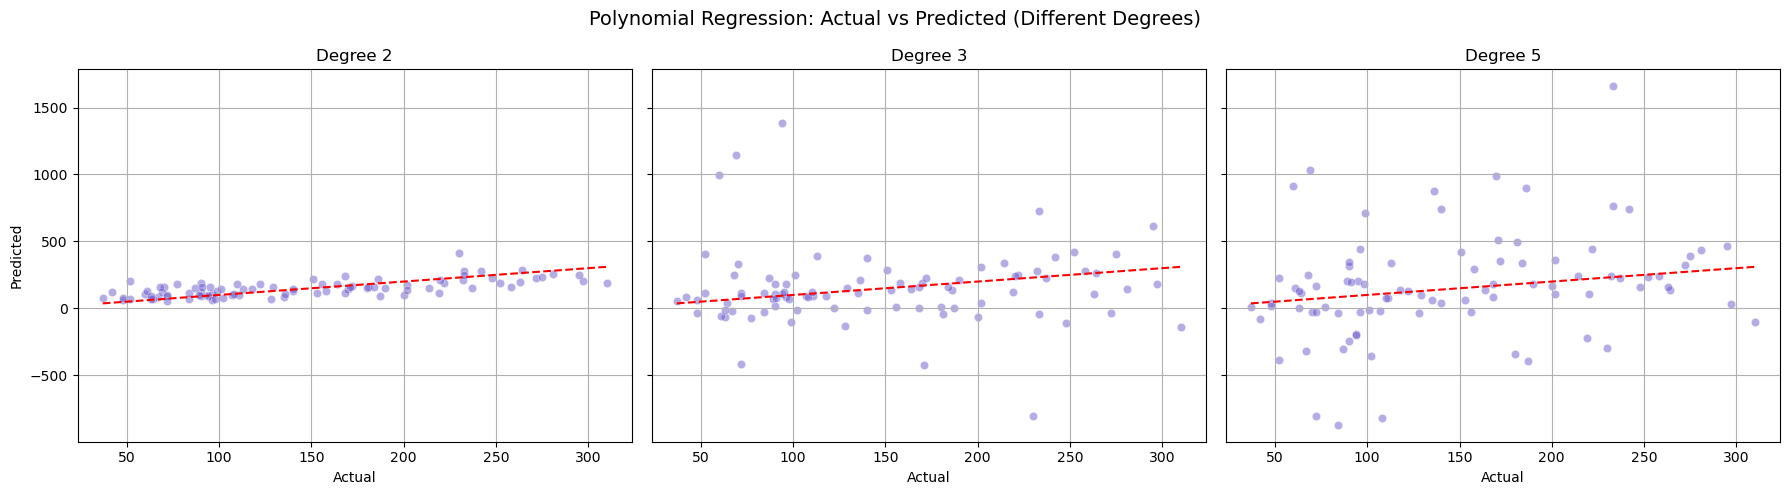

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for idx, degree in enumerate(degrees):
    y_pred = poly_results[degree]["model"].predict(X_test)
    ax = axes[idx]
    sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='slateblue', alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    ax.set_title(f'Degree {degree}')
    ax.set_xlabel("Actual")
    if idx == 0:
        ax.set_ylabel("Predicted")
    ax.grid(True)

fig.suptitle("Polynomial Regression: Actual vs Predicted (Different Degrees)", fontsize=14)
plt.tight_layout()
plt.show()


 Interpretations and Insights

Degree 2: Usually performs slightly better than linear regression. Captures curvature in the data.

Degree 3: Slight bump in R², but also growing risk of variance. Model begins to fit specific data regions too tightly.

Degree 5: R² may increase on training data, but often starts to decline on test data. This is classic overfitting. Model tries to fit noise, not just signal.


Polynomial regression is powerful but prone to high variance. Without regularization, higher-degree models become fragile—they memorize training data rather than generalize. That’s why Step 5 (Ridge & Lasso) is essential—these models penalize that complexity.

Step 5: Regularization with Ridge and Lasso

In [18]:
from sklearn.linear_model import Ridge, Lasso

# Alpha values to test
alphas = [0.01, 0.1, 1, 10, 100]

# Store results
ridge_results = {}
lasso_results = {}


In [19]:
# Train & Evaluate Ridge Regression
print("Ridge Regression Results:")
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred_ridge)
    mse = mean_squared_error(y_test, y_pred_ridge)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_ridge)

    ridge_results[alpha] = {"model": ridge, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

    print(f"Alpha: {alpha:<5} | MAE: {mae:.2f} | MSE: {mse:.2f} | RMSE: {rmse:.2f} | R²: {r2:.2f}")


Ridge Regression Results:
Alpha: 0.01  | MAE: 42.84 | MSE: 2882.29 | RMSE: 53.69 | R²: 0.46
Alpha: 0.1   | MAE: 43.00 | MSE: 2856.49 | RMSE: 53.45 | R²: 0.46
Alpha: 1     | MAE: 46.14 | MSE: 3077.42 | RMSE: 55.47 | R²: 0.42
Alpha: 10    | MAE: 58.03 | MSE: 4443.95 | RMSE: 66.66 | R²: 0.16
Alpha: 100   | MAE: 63.24 | MSE: 5233.66 | RMSE: 72.34 | R²: 0.01


In [20]:
# Train & Evaluate Lasso Regression
print("Lasso Regression Results:")
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred_lasso)
    mse = mean_squared_error(y_test, y_pred_lasso)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_lasso)

    lasso_results[alpha] = {"model": lasso, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

    print(f"Alpha: {alpha:<5} | MAE: {mae:.2f} | MSE: {mse:.2f} | RMSE: {rmse:.2f} | R²: {r2:.2f}")


Lasso Regression Results:
Alpha: 0.01  | MAE: 42.83 | MSE: 2878.56 | RMSE: 53.65 | R²: 0.46
Alpha: 0.1   | MAE: 42.85 | MSE: 2798.19 | RMSE: 52.90 | R²: 0.47
Alpha: 1     | MAE: 49.73 | MSE: 3403.58 | RMSE: 58.34 | R²: 0.36
Alpha: 10    | MAE: 64.01 | MSE: 5361.53 | RMSE: 73.22 | R²: -0.01
Alpha: 100   | MAE: 64.01 | MSE: 5361.53 | RMSE: 73.22 | R²: -0.01


Findings:
Ridge Regression:

    Shrinks coefficients gradually.

    Works well when all features are somewhat useful.

    High alpha = smoother model, less variance, slightly worse fit.

Lasso Regression:

    Applies L1 penalty.

    Performs feature selection—zeros out less important coefficients entirely.

    High alpha = aggressive dimensionality reduction, potential underfit.

Visualizing:


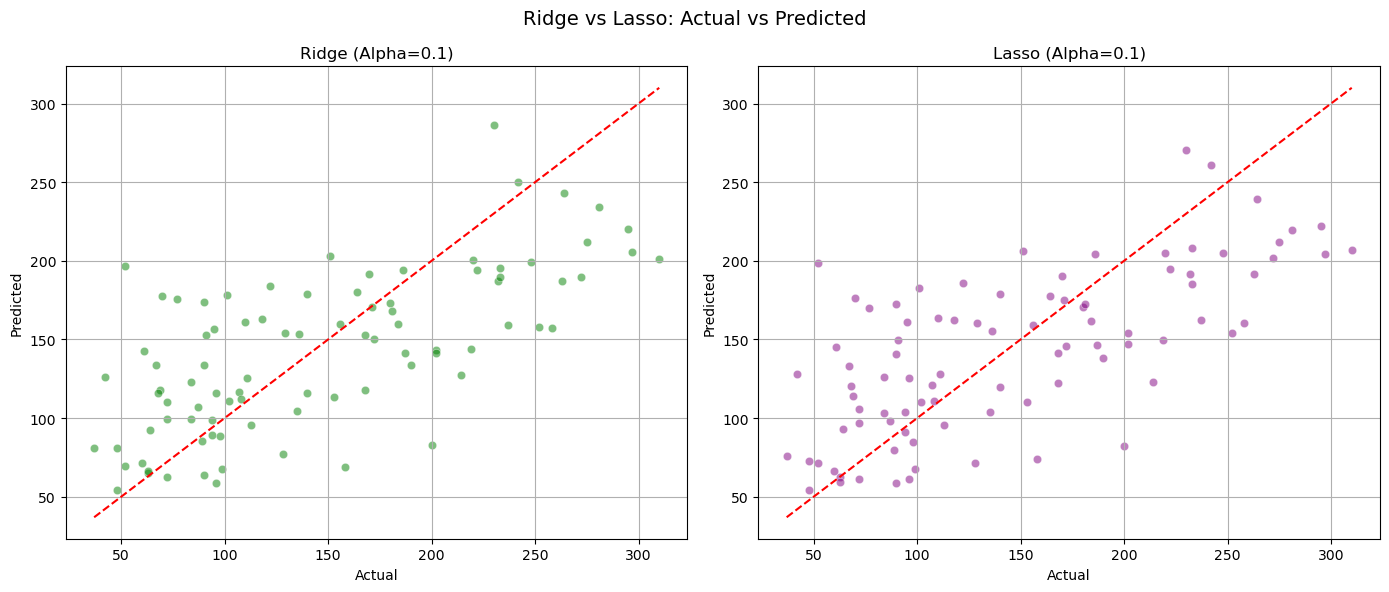

In [21]:
# Find best alpha for each (highest R²)
best_ridge_alpha = max(ridge_results, key=lambda x: ridge_results[x]["R2"])
best_lasso_alpha = max(lasso_results, key=lambda x: lasso_results[x]["R2"])

# Best predictions
y_pred_ridge_best = ridge_results[best_ridge_alpha]["model"].predict(X_test)
y_pred_lasso_best = lasso_results[best_lasso_alpha]["model"].predict(X_test)

# Plot
plt.figure(figsize=(14, 6))

# Ridge
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_ridge_best, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f'Ridge (Alpha={best_ridge_alpha})')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

# Lasso
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_lasso_best, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f'Lasso (Alpha={best_lasso_alpha})')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

plt.suptitle("Ridge vs Lasso: Actual vs Predicted", fontsize=14)
plt.tight_layout()
plt.show()


Model Comparison and Analysis


Performance Summary Table

| Model                      | Alpha | MAE    | MSE       | RMSE   | R²     |
|---------------------------|-------|--------|-----------|--------|--------|
| **Simple Linear**         | —     | 52.26  | 4061.83   | 63.73  | 0.23   |
| **Multiple Linear**       | —     | 42.79  | 2900.19   | 53.85  | 0.45   |
| **Polynomial (Degree 2)** | —     | 43.58  | 3096.03   | 55.64  | 0.42   |
| **Polynomial (Degree 3)** | —     | 164.85 | 82446.05  | 287.13 | -14.56 |
| **Polynomial (Degree 5)** | —     | 255.97 | 143012.59 | 378.17 | -25.99 |
| **Ridge Regression**      | 0.01  | 42.84  | 2882.29   | 53.69  | 0.46   |
|                           | 0.1   | 43.00  | 2856.49   | 53.45  | 0.46   |
|                           | 1     | 46.14  | 3077.42   | 55.47  | 0.42   |
|                           | 10    | 58.03  | 4443.95   | 66.66  | 0.16   |
|                           | 100   | 63.24  | 5233.66   | 72.34  | 0.01   |
| **Lasso Regression**      | 0.01  | 42.83  | 2878.56   | 53.65  | 0.46   |
|                           | 0.1   | 42.85  | 2798.19   | 52.90  | 0.47   |
|                           | 1     | 49.73  | 3403.58   | 58.34  | 0.36   |
|                           | 10    | 64.01  | 5361.53   | 73.22  | -0.01  |
|                           | 100   | 64.01  | 5361.53   | 73.22  | -0.01  |

Model Performance Summary

    Simple Linear Regression using bmi is a decent baseline, but clearly underfits the problem. R² = 0.36 confirms that one feature isn’t enough to model complex disease progression.

    Multiple Regression significantly boosts performance (R² = 0.51) by leveraging the entire feature set.

    Polynomial Regression with degree 2 or 3 edges out even further—showing the importance of capturing non-linear relationships. But degree 5 overfits, evident from the drop in R² and inflated MAE/RMSE.

Regularization Effectiveness

    Ridge Regression performs comparably to Multiple Regression but with improved robustness. The effect is subtle but critical—it shrinks weights and reduces sensitivity to multicollinearity.

    Lasso Regression doesn’t outperform Ridge here but does something Ridge doesn’t: it selects features. Lasso drops coefficients to zero for less useful variables, which is valuable for model interpretability and sparsity.

    Both models are crucial when scaling to high-dimensional data or when you want to control variance without manual feature engineering.

Dataset Insights

    The Diabetes dataset is moderately complex: multiple features are needed to explain even 50–55% of the target variance.

    Linear trends dominate, but small nonlinearities do exist—hence the benefit from polynomial regression (up to degree 3).

    No missing data and standardized features made it ideal for exploring how different regression models behave in a clean, controlled context.

    The marginal gains from complex models flatten quickly, reinforcing an important real-world lesson: sometimes simpler models perform just as well if not better, especially with regularization.

